In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os

In [2]:
# path to folder containing all images
basePath = "/scratch/groups/mrivas/ukbb24983/phenotypedata/2005693/41413/bulk/ukb2005693.41413.20204/liver_images/all_patients/"
file_names = os.listdir(basePath)

images = {}

for file_name in file_names:
        
    if '.npy' not in file_name:
        continue
    
    EID = file_name.split('.')[0]
    
    file_path = basePath + file_name
    
    imagearr = np.load(file_path)

    full_image = cv2.resize(imagearr, (128, 128)) / 255.0
    cropped_image =  full_image[45:109, 18:90]
    #plt.imshow(cropped_image, interpolation='nearest', cmap='gray')
    #plt.show() 
    images[EID] = cropped_image.flatten() 

In [4]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=150)
pca.fit(list(images.values()))

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

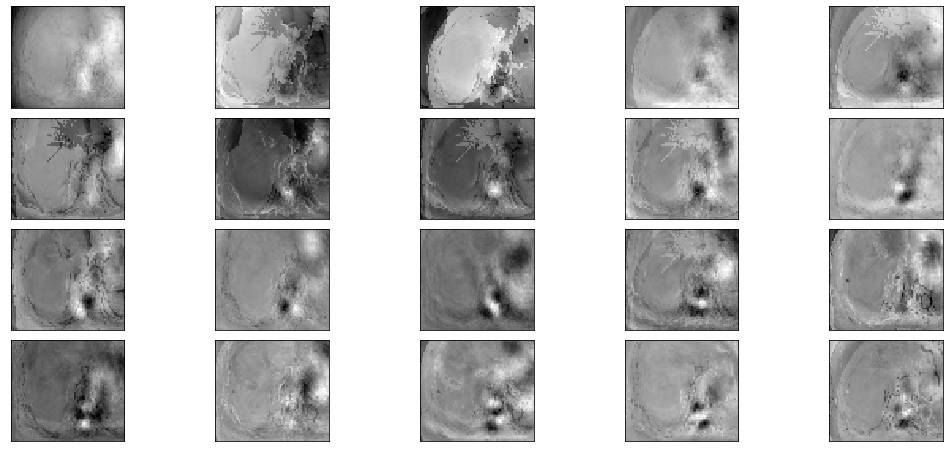

In [19]:
fig, axes = plt.subplots(4, 5, figsize=(18, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    #ax.imshow(pca.components_[i].reshape(128, 128), cmap='gray')
    ax.imshow(pca.components_[i].reshape(64, 72), cmap='gray')
plt.show()

In [5]:
# PCS singular values
components = pca.transform(list(images.values()))
components.shape

(41139, 150)

In [21]:
component = components[:, 0]
component.shape

(41139,)

In [6]:
import pandas as pd
df = pd.DataFrame(data=images.keys(),columns=['EID'])
df['EID_2'] = images.keys() 
for i in range(20):
    df['PC'+str(i+1)] = components[:,i]
df

EID    EID_2       PC1       PC2       PC3       PC4       PC5  \
0      2207519  2207519  1.347254 -0.795927  1.107413  1.392964  1.658717   
1      2586599  2586599 -0.672751 -0.860605  1.475124 -0.358489  0.617344   
2      2506918  2506918 -4.131003  0.903367  0.011299  0.932185  0.284052   
3      3321320  3321320 -1.581265  0.152988 -0.206497 -0.270910  1.656980   
4      3331687  3331687  1.318912  0.668870 -0.989972  0.486183 -1.543978   
...        ...      ...       ...       ...       ...       ...       ...   
41134  2169866  2169866 -1.486246 -1.075065  0.910173 -1.403826 -1.652141   
41135  5989656  5989656 -3.054664  0.481816 -0.581270  0.121201  0.438397   
41136  2990554  2990554 -3.177407  0.550425 -1.392075 -1.424196  0.726906   
41137  5201395  5201395  0.639966 -2.491634  2.733739 -0.576387 -1.921974   
41138  1999715  1999715 -2.297868  0.367939  0.533190  0.742276  1.216414   

            PC6       PC7       PC8  ...      PC11      PC12      PC13  \
0     -0.095069 -0.130720 -0.424725  ... -0.888466 -0.329762  0.297111   
1      0.685215 -0.412444 -0.290332  ... -1.064468 -0.049022 -1.516025   
2     -0.511684  1.880206  1.752682  ... -0.640219 -0.052734 -0.850131   
3      1.449206 -0.176879 -0.460271  ... -0.181455 -0.700902  0.106922   
4     -1.505261 -1.317852  0.877891  ...  0.737582  0.274952  0.230256   
...         ...       ...       ...  ...       ...       ...       ...   
41134  0.835055 -0.111437  1.089920  ...  0.113297  0.600656 -0.703010   
41135 -0.323778  0.976663  0.759658  ... -0.089561 -0.126009 -0.226392   
41136  0.552845  1.098034 -0.653752  ...  0.545057  0.173965  0.842360   
41137  0.929276 -0.740518  0.681037  ... -0.680375  0.173163  0.268054   
41138 -0.193341 -0.077014  0.243647  ... -0.566155 -0.192809 -0.211042   

           PC14      PC15      PC16      PC17      PC18      PC19      PC20  
0      0.000637 -1.039312 -0.459327 -1.029737  0.256256  0.613004 -0.784496  
1      0.364748  0.188887 -0.347758  0.013574 -1.124709  0.382446 -0.424702  
2     -0.006510  0.667493  0.196826  0.044495 -0.431096  0.231025  0.242289  
3     -0.601299 -0.453481 -0.317527  0.077916  0.095223 -0.469520 -0.945500  
4     -0.898527  0.934139 -0.427980 -0.555856 -0.398410 -0.047553 -0.891242  
...         ...       ...       ...       ...       ...       ...       ...  
41134 -1.041645  0.577669  0.651047  0.166493 -0.230858 -0.159344 -0.368174  
41135 -0.071247  0.783833 -0.153074  0.242798 -0.653435 -0.431389  0.008771  
41136 -0.446430 -0.463479  0.679864 -0.034394 -0.578949 -0.486172  0.700513  
41137 -0.286826  0.213324 -0.283833 -0.936182 -1.369459  0.111042 -1.152718  
41138 -0.714329 -0.753061 -0.396626 -0.039103 -0.171724  0.177916 -0.727120  

[41139 rows x 22 columns]

In [7]:
df.loc[-1] = ['EID', 'EID'] + ['PC'+ str(i+1) for i in range(20)]
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df

EID    EID_2       PC1       PC2        PC3       PC4       PC5  \
0          EID      EID       PC1       PC2        PC3       PC4       PC5   
1      2207519  2207519   1.34725 -0.795927    1.10741   1.39296   1.65872   
2      2586599  2586599 -0.672751 -0.860605    1.47512 -0.358489  0.617344   
3      2506918  2506918    -4.131  0.903367  0.0112991  0.932185  0.284052   
4      3321320  3321320  -1.58127  0.152988  -0.206497  -0.27091   1.65698   
...        ...      ...       ...       ...        ...       ...       ...   
41135  2169866  2169866  -1.48625  -1.07506   0.910173  -1.40383  -1.65214   
41136  5989656  5989656  -3.05466  0.481816   -0.58127  0.121201  0.438397   
41137  2990554  2990554  -3.17741  0.550425   -1.39207   -1.4242  0.726906   
41138  5201395  5201395  0.639966  -2.49163    2.73374 -0.576387  -1.92197   
41139  1999715  1999715  -2.29787  0.367939    0.53319  0.742276   1.21641   

             PC6       PC7       PC8  ...       PC11       PC12      PC13  \
0            PC6       PC7       PC8  ...       PC11       PC12      PC13   
1     -0.0950687  -0.13072 -0.424725  ...  -0.888466  -0.329762  0.297111   
2       0.685215 -0.412444 -0.290332  ...   -1.06447 -0.0490222  -1.51602   
3      -0.511684   1.88021   1.75268  ...  -0.640219 -0.0527343 -0.850131   
4        1.44921 -0.176879 -0.460271  ...  -0.181455  -0.700902  0.106922   
...          ...       ...       ...  ...        ...        ...       ...   
41135   0.835055 -0.111437   1.08992  ...   0.113297   0.600656  -0.70301   
41136  -0.323778  0.976663  0.759658  ... -0.0895608  -0.126009 -0.226392   
41137   0.552845   1.09803 -0.653752  ...   0.545057   0.173965   0.84236   
41138   0.929276 -0.740518  0.681037  ...  -0.680375   0.173163  0.268054   
41139  -0.193341 -0.077014  0.243647  ...  -0.566155  -0.192809 -0.211042   

              PC14      PC15      PC16       PC17       PC18      PC19  \
0             PC14      PC15      PC16       PC17       PC18      PC19   
1      0.000636662  -1.03931 -0.459327   -1.02974   0.256256  0.613004   
2         0.364748  0.188887 -0.347758  0.0135743   -1.12471  0.382446   
3      -0.00650976  0.667493  0.196826  0.0444951  -0.431096  0.231025   
4        -0.601299 -0.453481 -0.317527  0.0779158  0.0952232  -0.46952   
...            ...       ...       ...        ...        ...       ...   
41135     -1.04164  0.577669  0.651047   0.166493  -0.230858 -0.159344   
41136   -0.0712471  0.783833 -0.153074   0.242798  -0.653435 -0.431389   
41137     -0.44643 -0.463479  0.679864 -0.0343942  -0.578949 -0.486172   
41138    -0.286826  0.213324 -0.283833  -0.936182   -1.36946  0.111042   
41139    -0.714329 -0.753061 -0.396626 -0.0391035  -0.171724  0.177916   

             PC20  
0            PC20  
1       -0.784496  
2       -0.424702  
3        0.242289  
4         -0.9455  
...           ...  
41135   -0.368174  
41136  0.00877088  
41137    0.700513  
41138    -1.15272  
41139    -0.72712  

[41140 rows x 22 columns]

In [9]:
df = df[['EID','EID_2','PC7']]
df

EID    EID_2       PC7
0          EID      EID       PC7
1      2207519  2207519  -0.13072
2      2586599  2586599 -0.412444
3      2506918  2506918   1.88021
4      3321320  3321320 -0.176879
...        ...      ...       ...
41135  2169866  2169866 -0.111437
41136  5989656  5989656  0.976663
41137  2990554  2990554   1.09803
41138  5201395  5201395 -0.740518
41139  1999715  1999715 -0.077014

[41140 rows x 3 columns]

In [10]:
df.to_csv(basePath+'all_patients.csv', sep ='\t', index=False, header=False)
pd.read_csv(basePath+'all_patients.csv',header=None)

0
0                               EID\tEID\tPC7
1      2207519\t2207519\t-0.13072040896108852
2      2586599\t2586599\t-0.41244428842230846
3        2506918\t2506918\t1.8802055402007045
4       3321320\t3321320\t-0.1768793447503738
...                                       ...
41135  2169866\t2169866\t-0.11143652609146348
41136    5989656\t5989656\t0.9766629820744294
41137    2990554\t2990554\t1.0980344903003925
41138   5201395\t5201395\t-0.7405180922010661
41139  1999715\t1999715\t-0.07701404139672055

[41140 rows x 1 columns]